In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import io
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded.get('dataset.csv')))

The dataset contains information on renewable energy consumpition of U.S. production from different energy sources across various sectors, spanning from 1973. Here's an initial breakdown of its structure and the relevant insights we can explore further:

In [4]:
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                3065 non-null   int64  
 1   Month                               3065 non-null   int64  
 2   Sector                              3065 non-null   object 
 3   Hydroelectric Power                 3065 non-null   float64
 4   Geothermal Energy                   3065 non-null   float64
 5   Solar Energy                        3065 non-null   float64
 6   Wind Energy                         3065 non-null   float64
 7   Wood Energy                         3065 non-null   float64
 8   Waste Energy                        3065 non-null   float64
 9   Fuel Ethanol, Excluding Denaturant  3065 non-null   float64
 10  Biomass Losses and Co-products      3065 non-null   float64
 11  Biomass Energy                      3065 no

## Data Structure Overview:
* **Total Records:** 3,065
* **Columns:** 17, containing both numerical and categorical data.
* **Categorical Features:**
 * **Year:** Year of observation.
 * **Month:** Month of observation.
 * **Sector:** Sector of energy usage (e.g., Commercial, Electric Power, Industrial, etc.).
* **Numerical Features:** Renewable energy production or consumption in different categories, measured in consistent units (likely million kWh or equivalent). These include:
 * Hydroelectric Power, Geothermal Energy, Solar Energy, Wind Energy, Wood Energy, Waste Energy.
 * Fuel Ethanol, Excluding Denaturant, Biomass Energy, Biomass Losses and Co-products.
 * Total Renewable Energy, Renewable Diesel Fuel, Biodiesel, Other Biofuels.
 * Conventional Hydroelectric Power.

## Columns
* **Year**

The calendar year of the data point

* **Month**

The month number (1-12) of the data point

* **Sector**

The energy consumption sector (Commercial, Electric Power, Industrial, Residential, or Transportation)

* **Hydroelectric Power**

Hydroelectric power consumption in the given sector and month, in trillion BTUs

* **Geothermal Energy**

Geothermal energy consumption in the given sector and month, in trillion BTUs

* **Solar Energy**

Solar energy consumption in the given sector and month, in trillion BTUs

* **Wind Energy**

Wind energy consumption in the given sector and month, in trillion BTUs

* **Wood Energy**

Wood energy consumption in the given sector and month, in trillion BTUs

* **Waste Energy**

Waste energy consumption in the given sector and month, in trillion BTUs

* **Fuel Ethanol, Excluding Denaturant**

Fuel ethanol (excluding denaturant) consumption in the given sector and month, in trillion BTUs

* **Biomass Losses and Co-products**

Biomass losses and co-products in the given sector and month, in trillion BTUs

* **Biomass Energy**

Total biomass energy consumption (sum of wood, waste, ethanol, and losses/co-products) in the given sector and month, in trillion BTUs

* **Total Renewable Energy**

Total renewable energy consumption (sum of hydroelectric, geothermal, solar, wind, and biomass) in the given sector and month, in trillion BTUs

* **Renewable Diesel Fuel**

Renewable diesel fuel consumption in the given sector and month, in trillion BTUs

* **Other Biofuels**

Other biofuels consumption in the given sector and month, in trillion BTUs

* **Conventional Hydroelectric Power**

Conventional hydroelectric power consumption in the given sector and month, in trillion BTUs

* **Biodiesel**

Biodiesel consumption in the given sector and month, in trillion BTUs

In [6]:
# Biomass energy is a sum of all the energy production ways related to it
# Losses and waste energy is not important to our analyses because here gona be analysed the energy consumption
df['Biomass Ajusted'] = df['Biomass Energy'] - (df['Biomass Losses and Co-products'] + df['Waste Energy'])
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel,Biomass Ajusted
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0,0.570
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0,0.054
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0,98.933
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0,0.000
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.000


In [7]:
df.tail()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel,Biomass Ajusted
3060,2024,1,Commerical,0.073,1.669,4.267,0.036,7.053,6.233,2.441,0.000,15.728,21.773,0.00,0.000,0.000,0.000,9.495
3061,2024,1,Electric Power,0.000,4.667,32.707,119.265,15.071,13.873,0.000,0.000,28.944,257.661,0.00,0.000,72.078,0.000,15.071
3062,2024,1,Industrial,0.308,0.356,0.987,0.035,104.878,14.171,1.533,67.742,188.325,190.011,0.00,0.000,0.000,0.000,106.412
3063,2024,1,Residential,0.000,3.354,14.897,0.000,34.065,0.000,0.000,0.000,0.000,52.316,0.00,0.000,0.000,0.000,0.000
3064,2024,1,Transportation,0.000,0.000,0.000,0.000,0.000,0.000,86.098,0.000,140.188,0.000,30.78,3.442,0.000,19.867,140.188


## Next Steps for Analysis:
Below are some possible insights and explorations that I’ll pursue:

1. **Overall Trends in Renewable Energy**

 * Are total renewable energy sources increasing over time?
 * Which sectors are contributing the most to renewable energy?


2. **Sector-Wise Energy Consumption**

 * Which sectors rely most on specific renewable sources?
 * Comparison of sectoral trends in energy production (e.g., growth in Electric Power vs. Industrial).


3. **Renewable Source Trends**

 * Growth trends for individual energy sources: Solar, Wind, Biomass, etc.
 * How much has the composition of renewable energy sources changed over time?


4. **Monthly and Seasonal Patterns**

 * Do any of the energy sources exhibit seasonal patterns or cycles (e.g., Solar or Wind)?
 * Year-over-year comparisons by month for key sectors.


5. **Biomass and Biofuels Impact**

 * Biomass and biofuels contributions to the overall energy picture.
 * Trends in less traditional sources like Waste Energy, Renewable Diesel, etc.

Let’s start by checking the **overall trends in total renewable energy production** over the years. This will give us a high-level view of how renewable energy adoption has evolved.

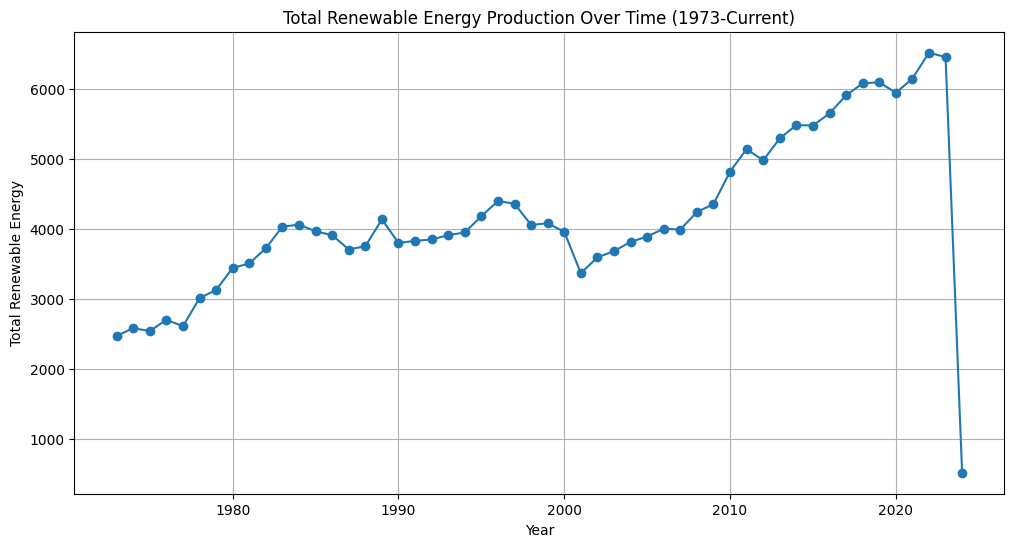

In [8]:
# Grouping data by Year and summing the Total Renewable Energy to observe yearly trends
yearly_trends = df.groupby('Year')['Total Renewable Energy'].sum()

# Plotting the trend of Total Renewable Energy over the years
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends.index, yearly_trends.values, marker='o', linestyle='-')
plt.title("Total Renewable Energy Production Over Time (1973-Current)")
plt.xlabel("Year")
plt.ylabel("Total Renewable Energy")
plt.grid(True)
plt.show()

## Insight 1: Growth in Total Renewable Energy Production Over Time
The line plot above shows the evolution of total renewable energy production from 1973 to the most recent year in the dataset. Key insights from this trend:

1. **Steady Growth:**

 * Renewable energy production shows a slow but consistent growth trend, particularly starting from the 2000s.
 * Prior to the 2000s, growth appears more gradual, reflecting the lower adoption and development of these energy sources during earlier periods.


2. **Acceleration in the 2000s and Beyond:**

 * There is a noticeable increase in the slope post-2000, likely due to increased investments, technological advancements, and policy efforts supporting renewable energy.


3. **Recent Plateau or Saturation?:**

 * In the latest years, there seems to be a slight flattening of the curve. This could indicate either:
 * **Capacity limits** or slowing growth.
 * **Market shifts** or energy saturation in key sectors.

This analysis highlights the need to look deeper into **which sources of energy** (e.g., solar, wind) have contributed to this growth. Next, I'll explore individual energy sources to uncover which ones have experienced the most significant increases and the relative contributions of each source to the overall trend.

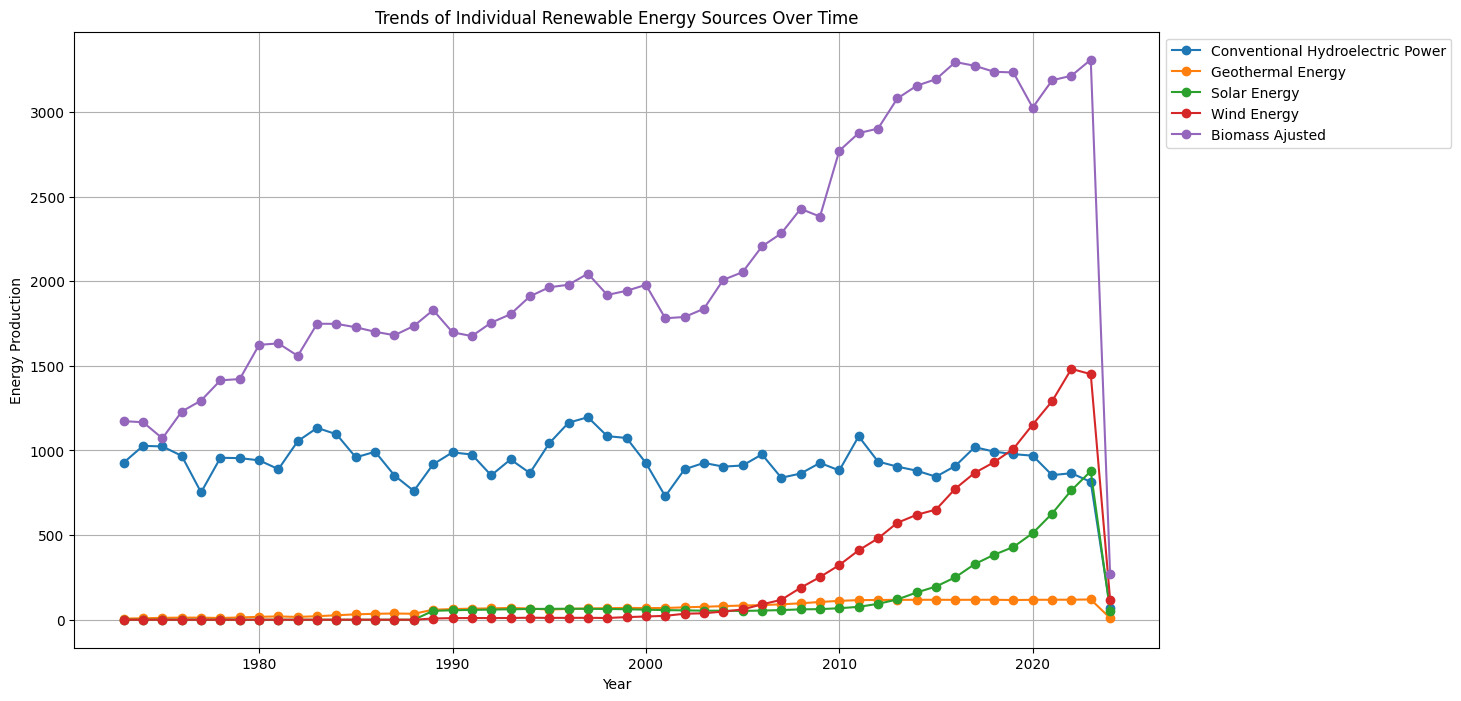

In [9]:
# Summarizing the yearly trends for individual renewable sources
energy_sources = [
    'Conventional Hydroelectric Power', 'Geothermal Energy', 'Solar Energy',
    'Wind Energy', 'Biomass Ajusted'
]

# Grouping by Year and summing values for each energy source
source_trends = df.groupby('Year')[energy_sources].sum()

# Plotting trends for individual energy sources
plt.figure(figsize=(14, 8))

for source in energy_sources:
    plt.plot(source_trends.index, source_trends[source], marker='o', linestyle='-', label=source)

plt.title("Trends of Individual Renewable Energy Sources Over Time")
plt.xlabel("Year")
plt.ylabel("Energy Production")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Insight 2: Trends of Individual Renewable Energy Sources Over Time
This chart provides a breakdown of the key energy sources contributing to total renewable energy production. Here's what we observe:

1. **Hydroelectric Power:**

 * The dominant electric renewable energy source in earlier years, especially before 2000.
 * Growth in hydroelectric power has been relatively stable with limited recent increases, likely due to infrastructure limitations and environmental constraints.


2. **Wind Energy:**

 * Significant growth starting from the late 1990s and accelerating rapidly around 2010.
 * This reflects the large-scale deployment of wind farms and increased investments in wind technology.


3. **Solar Energy:**

 * Solar energy shows an exponential growth trend starting in the 2010s, reflecting falling costs of solar panels and increased adoption.
 * Solar energy's contribution, though small initially, is growing rapidly.


4. **Geothermal Energy:**

 * Relatively flat growth over the years, suggesting limited expansion compared to other renewable sources.
 * This may be due to geographical constraints and the high costs of geothermal projects.


5. **Biomass Energy:**

 * Biomass energy shows signifficant growth, with fluctuations reflecting changing usage patterns.
 * Biomass energy increase, can be explained because of the industrial energy demand.
 * important to remember that Biomass includes every tipe of energy comsumption and production, not only electric.

## Key Takeaways:

* **Wind and Solar Energy** are driving the modern growth in renewable energy, especially after 2000.
* **Hydroelectric Power** remains a significant but stable component, with little growth in recent years.
* **Geothermal** make a small contribution, with limited growth over time.
* **Biomass** meke the biggest amout of energy consumption.

Next, I’ll analyze **sector-wise consumption trends** to see which sectors (e.g., Residential, Industrial) rely on specific energy sources and how that has evolved over time.

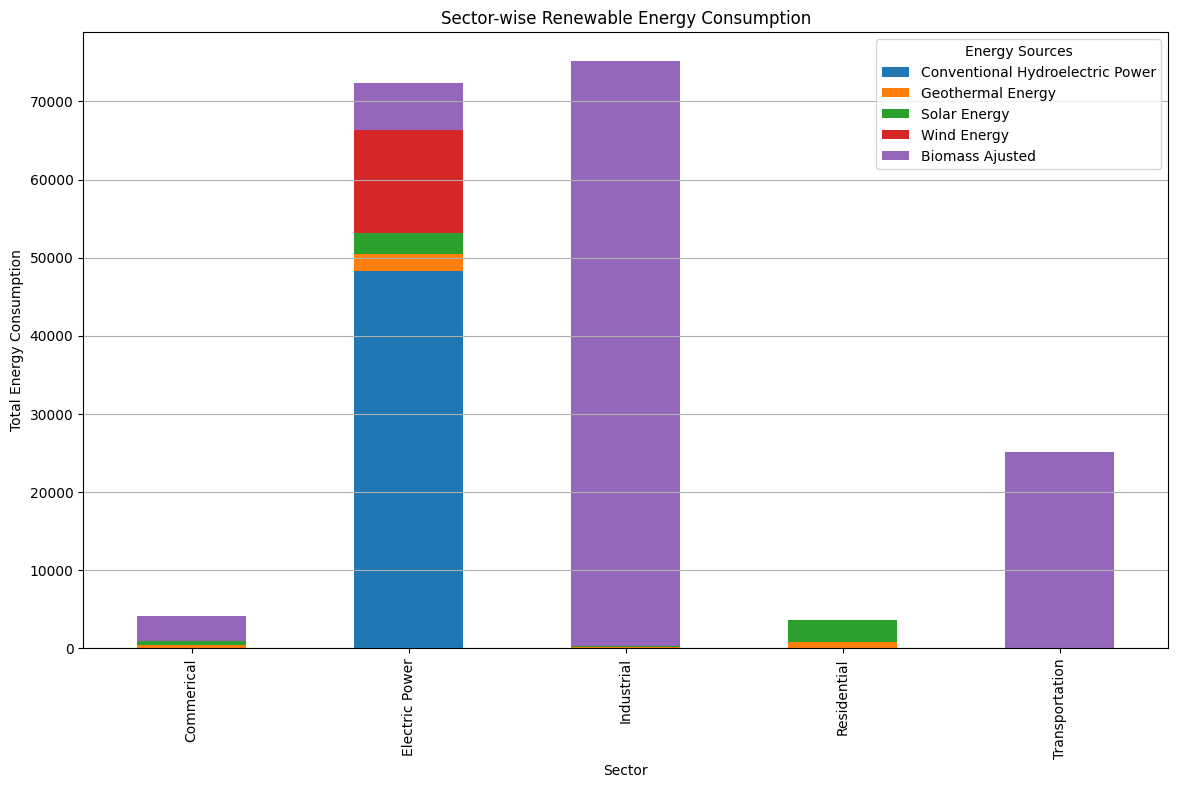

In [10]:
# Grouping data by sector and summing each renewable energy source to identify sectoral reliance
sector_trends = df.groupby('Sector')[energy_sources].sum()

# Plotting sector-wise reliance on renewable energy sources
sector_trends.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title("Sector-wise Renewable Energy Consumption")
plt.xlabel("Sector")
plt.ylabel("Total Energy Consumption")
plt.legend(title="Energy Sources", bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()

## Insight 3: Sector-Wise Renewable Energy Consumption
The stacked bar chart above highlights how various sectors rely on different renewable energy sources. Here are the key takeaways:

1. **Electric Power Sector:**

 * Dominates the consumption of **hydroelectric power, wind energy, and solar energy**.
 * This sector benefits the most from large-scale energy infrastructure, such as wind farms and hydroelectric plants, which generate electricity for broad consumption.


2. **Industrial Sector:**

 * Significant use of **biomass energy**.
 * Industrial applications likely include biomass-based cogeneration plants and the use of wood as fuel for heating and process energy.


3. **Transportation Sector:**

 * Almost exclusively reliant on **biomass-based fuels** like **renewable diesel and biodiesel**.
 * Reflects the push toward biofuels as an alternative to fossil fuels for vehicles and fleets.


4. **Residential Sector:**

 * Moderate use of **wood energy**, likely for heating purposes.
 * Limited usage of other renewable energy sources, reflecting reliance on grid electricity.


5. **Commercial Sector:**

 * Smaller but diverse consumption of **wood energy**/**Biomass energy** and other sources.
 * May reflect renewable energy use in heating and sustainable practices across commercial operations.

## Key Insights:

* The **electric power sector** is the backbone of renewable energy adoption, focusing on large-scale solar, wind, and hydro energy generation.
* **Industrial and transportation sectors** rely heavily on biomass and biofuels, showcasing their role in decarbonizing heavy industries and transportation.
* The **residential sector** has limited renewable energy use beyond wood, indicating a potential area for future growth with rooftop solar or renewable electricity adoption.

Next, I'll explore **seasonal and monthly patterns** in energy production to uncover any cyclical trends. This will be particularly useful for sources like solar and wind, which may have seasonal variability.

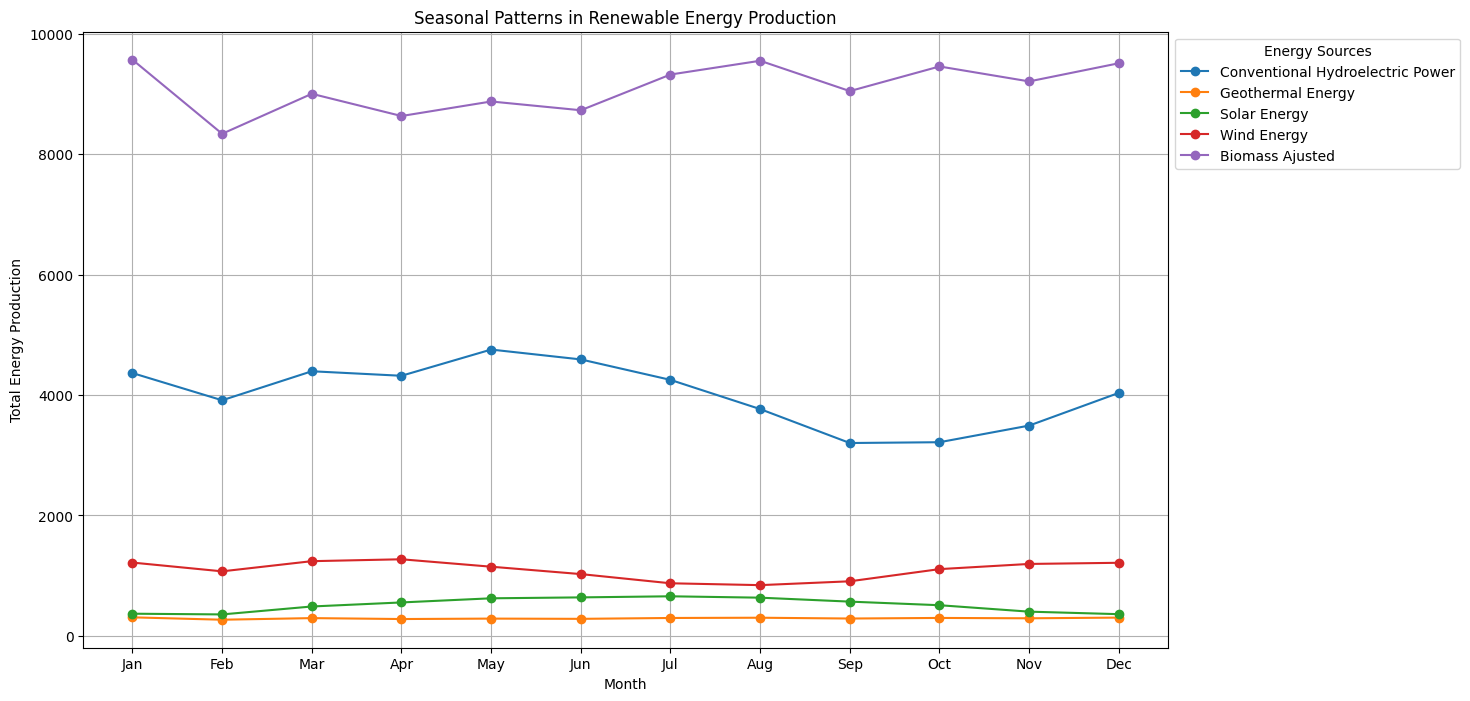

In [11]:
# Grouping data by Month and summing across all years to detect seasonal patterns
monthly_trends = df.groupby('Month')[energy_sources].sum()

# Plotting seasonal patterns in renewable energy production
plt.figure(figsize=(14, 8))

for source in energy_sources:
    plt.plot(monthly_trends.index, monthly_trends[source], marker='o', linestyle='-', label=source)

plt.title("Seasonal Patterns in Renewable Energy Production")
plt.xlabel("Month")
plt.ylabel("Total Energy Production")
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend(title="Energy Sources", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Insight 4: Seasonal Patterns in Renewable Energy Production
The chart above shows how energy production varies by month across different renewable sources. Here are the key observations:

1. **Solar Energy:**

 * Predictable seasonal pattern with a peak in the summer months (June-July) and a dip in winter (December-January).
 * This is expected since solar output is directly influenced by the amount of sunlight.


2. **Wind Energy:**

 * Wind energy shows slight variability, with increased production during the winter months (January-March).
 * This pattern reflects seasonal wind patterns, which are often stronger in colder months.


3. **Hydroelectric Power:**

 * Production peaks in the spring and early summer months (May-July), likely due to snowmelt and increased water flow in rivers.
 * There’s a drop in hydroelectric output during winter (December-February), possibly due to freezing conditions or reduced water availability.


4. **Geothermal Energy:**

 * Minimal seasonal variability, which aligns with the stable nature of geothermal energy sources.
 * Geothermal plants can operate consistently throughout the year.


5. **Biomass Energy:**

 * Show relatively flat trends, with no pronounced seasonal fluctuations, reflecting stable consumption patterns.
 * These sources are often used continuously in industrial processes or for heating.

## Key Insights:

* **Solar and wind energy** exhibit distinct seasonal patterns, which may require **energy storage solutions** to manage supply during low-production periods.
* **Hydroelectric energy** peaks during spring and summer, complementing solar energy patterns but with some variability.
* **Geothermal and biomass** provide stability, helping balance the fluctuations from solar and wind sources.

Next, I'll train a model to make a forecast analysis of the next 5 years of total renewable energy production.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


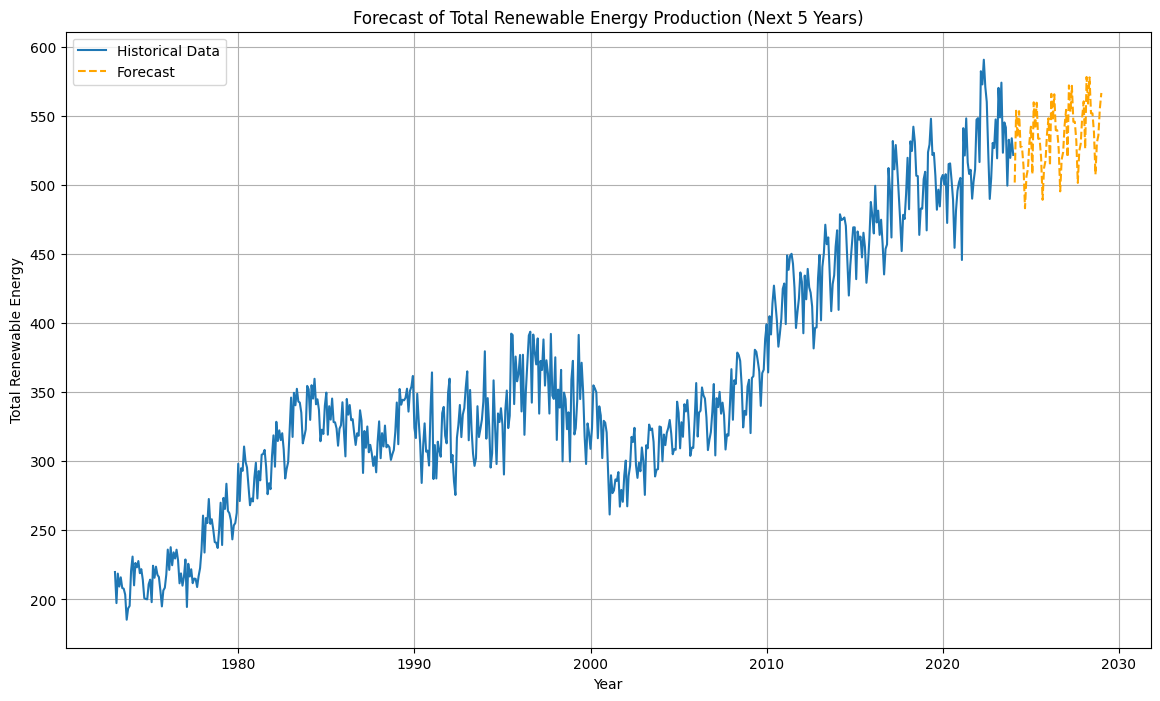

In [12]:
# importing necessary packages due to session context loss
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Preparing the data for forecasting (monthly aggregation for Total Renewable Energy)
monthly_totals = df.groupby(['Year', 'Month'])['Total Renewable Energy'].sum()
monthly_totals.index = pd.to_datetime(monthly_totals.index.map(lambda x: f"{x[0]}-{x[1]:02d}"))

# Applying Exponential Smoothing for forecasting
model = ExponentialSmoothing(monthly_totals, trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()

# Forecasting the next 5 years (60 months)
forecast = fitted_model.forecast(steps=60)

# Plotting the forecast along with historical data
plt.figure(figsize=(14, 8))
plt.plot(monthly_totals, label='Historical Data')
plt.plot(forecast, label='Forecast', linestyle='--', color='orange')
plt.title("Forecast of Total Renewable Energy Production (Next 5 Years)")
plt.xlabel("Year")
plt.ylabel("Total Renewable Energy")
plt.legend()
plt.grid(True)
plt.show()

## Forecast of Total Renewable Energy Production (Next 5 Years)

The forecast plot shows both historical data and projected trends for total renewable energy production over the next five years. Here are the key insights from the forecast:

1. **Continued Growth Trend:**

 * The forecast suggests a steady upward trajectory, indicating ongoing growth in renewable energy production.


2. **Seasonal Fluctuations:**

 * Seasonal patterns are expected to persist, reflecting the influence of factors such as **solar energy peaks in summer** and **hydroelectric surges in spring**.


3. **Moderate Acceleration:**

 * The slope of the trend indicates a slightly faster growth rate in comparison to earlier years, possibly reflecting increasing adoption of renewable technologies like wind and solar.

To predict **sector-specific energy trends**, I will apply forecasting models to the **total renewable energy used within each sector**. This will provide insights into how renewable energy usage might evolve across key sectors such as **Electric Power, Industrial, Commercial, Residential, and Transportation** over the next few years.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the

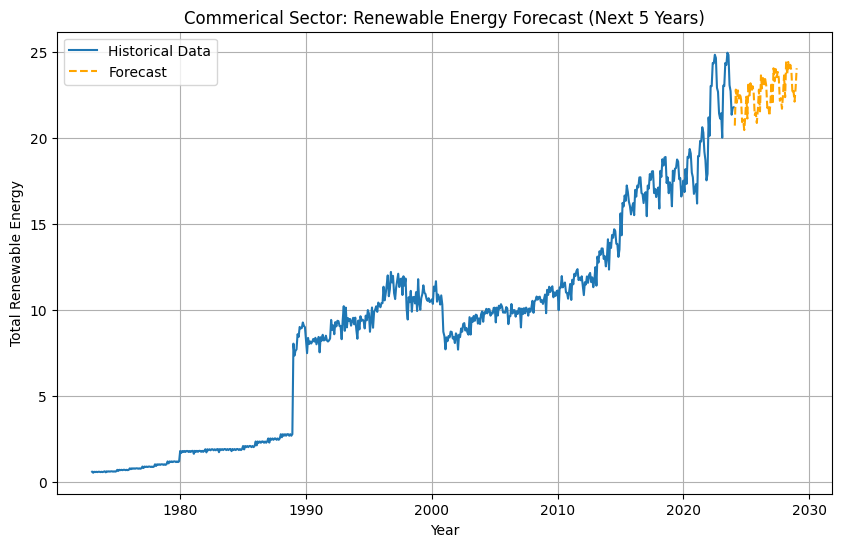

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


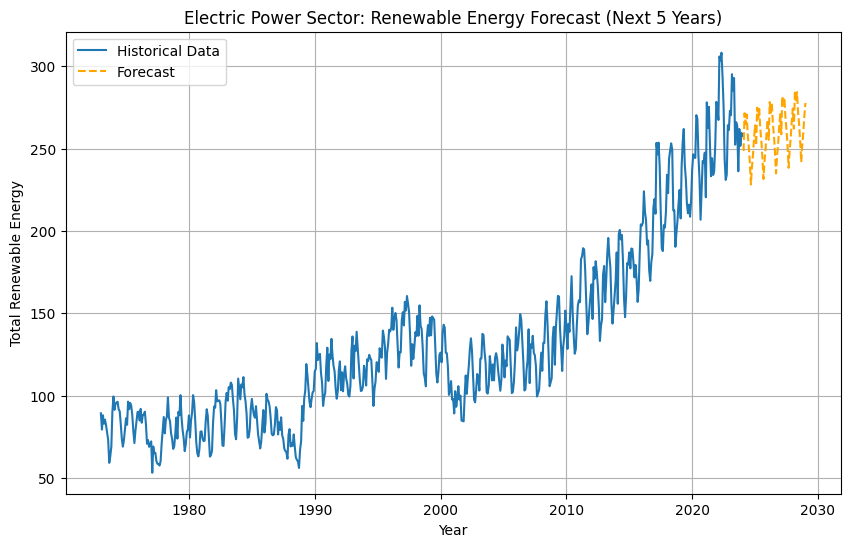

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


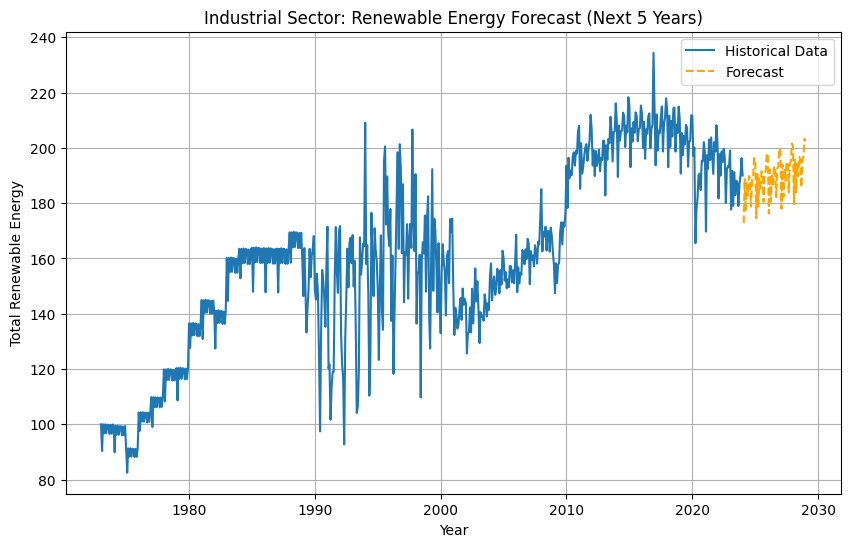

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


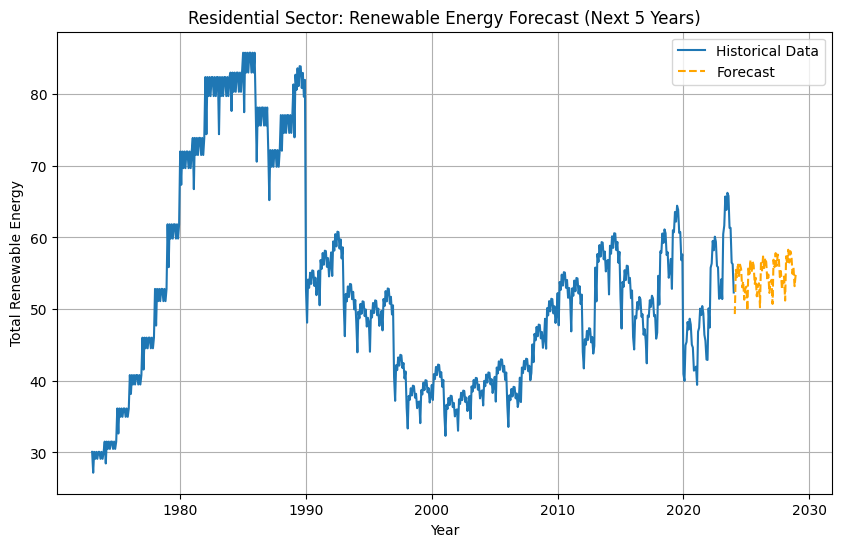

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


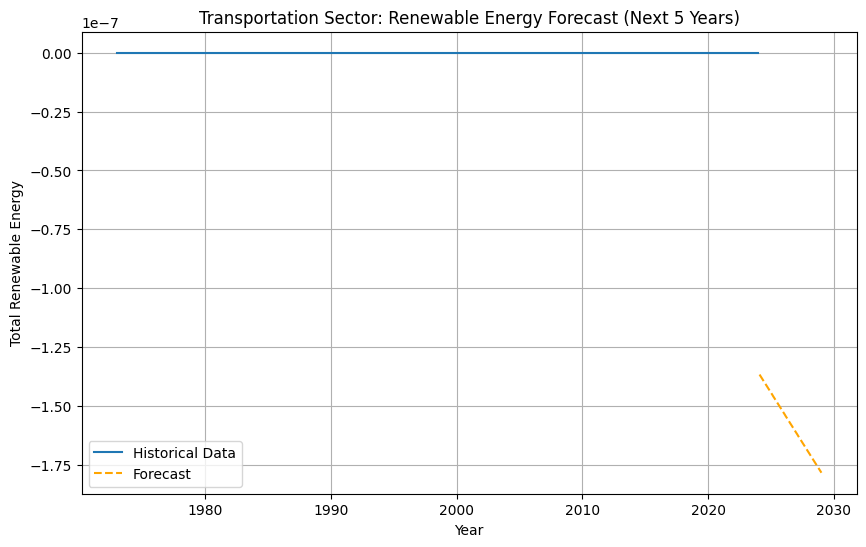

In [13]:
# Preparing sector-wise data for forecasting
sector_totals = df.groupby(['Year', 'Month', 'Sector'])['Total Renewable Energy'].sum().unstack()

# Forecasting setup: Defining a function to forecast for each sector
sector_forecasts = {}
steps = 60  # Forecasting the next 5 years (60 months)

for sector in sector_totals.columns:
    # Fitting Exponential Smoothing model to each sector's time series
    model = ExponentialSmoothing(sector_totals[sector], trend='add', seasonal='add', seasonal_periods=12)
    fitted_model = model.fit()

    # Storing forecast results
    forecast = fitted_model.forecast(steps=steps)
    sector_forecasts[sector] = forecast

# Ensuring the sector totals are properly formatted for each sector
sector_totals_clean = sector_totals.reset_index().melt(id_vars=['Year', 'Month'], var_name='Sector', value_name='Energy')

# Loop through each sector for forecasting and plotting
for sector in sector_totals_clean['Sector'].unique():
    # Extract the time series for the sector
    sector_data = sector_totals_clean[sector_totals_clean['Sector'] == sector]
    sector_data = sector_data.pivot(index=['Year', 'Month'], columns='Sector', values='Energy').squeeze()

    # Ensure a datetime index
    sector_data.index = pd.to_datetime(sector_data.index.map(lambda x: f"{x[0]}-{x[1]:02d}"))

    # Fit the model for this sector
    model = ExponentialSmoothing(sector_data, trend='add', seasonal='add', seasonal_periods=12)
    fitted_model = model.fit()

    # Forecast the next 5 years (60 months)
    forecast = fitted_model.forecast(steps=60)

    # Plot historical data and forecast
    plt.figure(figsize=(10, 6))
    plt.plot(sector_data, label='Historical Data')
    plt.plot(forecast, label='Forecast', linestyle='--', color='orange')
    plt.title(f"{sector} Sector: Renewable Energy Forecast (Next 5 Years)")
    plt.xlabel("Year")
    plt.ylabel("Total Renewable Energy")
    plt.legend()
    plt.grid(True)
    plt.show()

## Sector-Specific Renewable Energy Forecasts (Next 5 Years)

The individual plots above show both the historical data and the forecasts for each sector over the next 5 years. Here are some general insights from these forecasts:

1. **Electric Power Sector:**

 * Continues to dominate in terms of renewable energy adoption, with a steady upward trend in production.
 * Seasonal fluctuations may persist, driven by sources like hydro and wind energy.


2. **Industrial Sector:**

 * Shows stable but gradual growth, likely due to the reliance on biomass and wood energy.
 * The forecast suggests this sector will continue its current trajectory without drastic changes.


3. **Commercial Sector:**

 * Expected to grow steadily, though at a more modest pace.
 * Reflects gradual adoption of renewables in commercial buildings and operations.


4. **Residential Sector:**

 * Displays more moderate growth, reflecting small but consistent adoption, possibly through rooftop solar or wood heating.


5. **Transportation Sector:**

 * Forecasted to experience incremental growth, driven by the adoption of biofuels.
 * However, growth is limited, highlighting challenges with scaling biofuel adoption compared to other sectors.

## Conclusion and Recommendations

1. **Storage and Grid Flexibility:**

 * Given the seasonal variability in solar and wind energy, investments in energy storage systems (e.g., batteries, pumped hydro) and a more flexible energy grid will be essential for managing supply and demand fluctuations.


2. **Diversification and Innovation:**

 * Further efforts to expand geothermal and biomass technologies could provide stable, year-round energy, reducing reliance on weather-dependent sources.


3. **Electrification of Transportation and Industry:**

 * To accelerate decarbonization, the transportation sector will need to adopt electric vehicles alongside biofuels. Similarly, industrial processes can further integrate renewable electricity where feasible.


4. **Policy Support and Investments:**

 * Continued government incentives and private investments will be critical to sustaining renewable energy growth. Support for sectors like residential and commercial can help decentralize energy generation through rooftop solar and other distributed systems.

## Final Thoughts
This analysis reveals that while renewable energy is on a strong upward trajectory, challenges remain. Sector-specific dynamics suggest that the electric power sector will lead the way, but other sectors need focused efforts to increase their share of renewables. Strategic planning around storage, grid management, and electrification will be key to ensuring a smooth transition to a sustainable energy future.